<div class="alert alert-block alert-success">
<h1>Dependency on Sea Ice Concentration</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>

1. [SIC within 3.125km x 3.125km Grid](#section1)
1. [29 Matches: Load Data](#section2)
1. [Matching SIC within 3.125km x 3.125km to Satellite Gird (25km x 25km)](#section3)
    1. [Test with First Match: 2019-05-06](#section3.1)
    1. [Extract the 8x8 Box of SIC for each Match in 2019](#section3.2)
    1. [Extract the 8x8 Box of SIC for each Match in 2021](#section3.3)
    1. [Extract the 8x8 Box of SIC for each Match in 2022](#section3.4)
    1. [Load all Extracted 8x8 Box of SIC and Calculate Mean SIC](#section3.5)
1. [Analysis of Sea Ice Concentration Dependency](#section4)
    1. [Map of Sea Ice Concentration for 27 Matches](#section4.1)
    1. [Histogram of SIC](#section4.2)

<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr
import netCDF4 as nc
import cartopy as cp

import cartopy.crs as ccrs 
import cartopy.feature as cfeature

import seaborn as sns

import os

<div class="alert alert-info" role="alert">

## <a id="section1"></a>SIC within 3.125km x 3.125km Grid 
[Back to top](#TOC_TOP)

</div>

Sea ice concenration prodcut: https://www.cen.uni-hamburg.de/en/icdc/data/cryosphere/seaiceconcentration-asi-amsre.html

Spatial resolution: 3.125 km x 3.125 km

In [2]:
data_dir = "SIC_3.125km/2019/"
file_pattern = "UH-IFM__ASI-L3-SeaIceConcentration_AMSR2__3.125kmPOLSTEREO__SH__20190506__v02.nc"
file_path = data_dir + file_pattern
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:                (y: 2656, x: 2528, time: 1)
Coordinates:
  * y                      (y) int16 1 2 3 4 5 6 ... 2652 2653 2654 2655 2656
  * x                      (x) int16 1 2 3 4 5 6 ... 2524 2525 2526 2527 2528
  * time                   (time) datetime64[ns] 2019-05-06T12:00:00
Data variables:
    land                   (y, x) int8 ...
    longitude              (y, x) float32 ...
    latitude               (y, x) float32 ...
    sea_ice_concentration  (time, y, x) float32 ...
Attributes: (12/17)
    Comment:            List of swath files used for the daily mean: ['GW1AM2...
    grid_resolution:    3.125 km
    description:        gridded ASI AMSR2 sea ice concentration
    algorithm:          ASI v5
    title:              Daily averaged Antarctic sea ice concentration derive...
    tiepoints:          P0=47 K, P1=11.7 K
    ...                 ...
    datasource:         JAXA L1R v2
    grid:               NSIDC polar stereographic with tangential plane at 70...
    sensor:             AMSR2
    cite:               Beitsch, A., Kaleschke, L., and Kern, S. : Investigat...
    geocorrection:      none
    history:            Created Tue May  7 12:45:11 2019

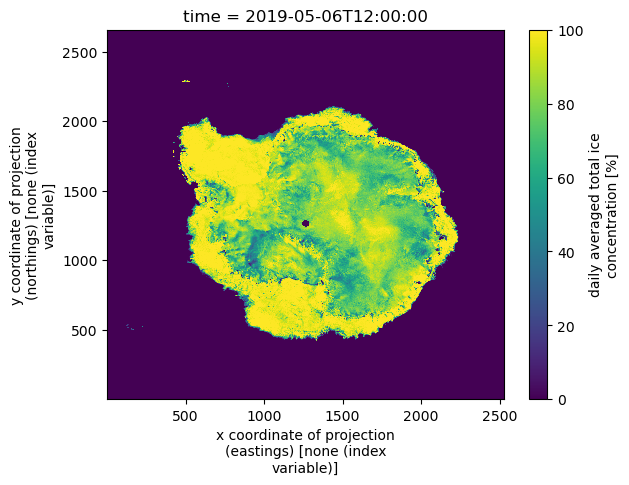

In [3]:
ds["sea_ice_concentration"].plot()

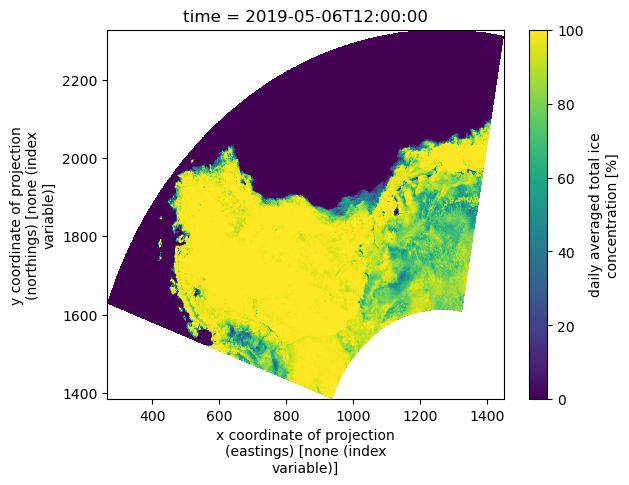

In [4]:
lon_box = [-70, 10]
lat_box = [-80, -60]

mask_lon = (ds["longitude"] >= lon_box[0]) & (ds["longitude"] <= lon_box[1])
mask_lat = (ds["latitude"] >= lat_box[0]) & (ds["latitude"] <= lat_box[1])

subset_ds = ds.where(mask_lon & mask_lat, drop=True)
subset_ds["sea_ice_concentration"].plot()

<div class="alert alert-info" role="alert">

## <a id="section2"></a>29 Matches: Load Data 
[Back to top](#TOC_TOP)

</div>

In [5]:
file = "matches_2019.txt"
ds_2019 = pd.read_csv(file, sep=None, engine="python") 

In [6]:
file = "matches_2021.txt"
ds_2021 = pd.read_csv(file, sep=None, engine="python") 

In [7]:
file = "matches_2022.txt"
ds_2022 = pd.read_csv(file, sep=None, engine="python") 

In [8]:
matches_all = pd.concat([ds_2019, ds_2021, ds_2022])
merged_df = matches_all.reset_index(drop=True)
merged_df

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15


<div class="alert alert-info" role="alert">

## <a id="section3"></a>Matching SIC within 3.125km x 3.125km to Satellite Gird (25km x 25km)  
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section3.1"></a>Test with First Match: 2019-05-06
[Back to top](#TOC_TOP)

</div>

In [9]:
# center point 
center_lon = merged_df["lon_Kako20"][0]
center_lat = merged_df["lat_Kako20"][0]

flat_lon = ds["longitude"].values.flatten()
flat_lat = ds["latitude"].values.flatten()

# Calculate the distances to the center point
distances = np.sqrt((flat_lon - center_lon)**2 + (flat_lat - center_lat)**2)

min_idx = distances.argmin()

y_index, x_index = np.unravel_index(min_idx, ds["longitude"].shape)

# grid size (8x8)
grid_size = 8
half_grid_size = grid_size // 2

# Adjust index bounds to ensure the box is centered correctly
y_start_idx = max(0, y_index - half_grid_size)
y_end_idx = min(ds.dims["y"], y_index + half_grid_size)  

x_start_idx = max(0, x_index - half_grid_size +1 )
x_end_idx = min(ds.dims["x"], x_index + half_grid_size +1 )  # +1 

# Extract the 8x8 grid section
extracted_section = ds.isel(y=slice(y_start_idx, y_end_idx), x=slice(x_start_idx, x_end_idx))


extracted_section

<xarray.Dataset>
Dimensions:                (y: 8, x: 8, time: 1)
Coordinates:
  * y                      (y) int16 1757 1758 1759 1760 1761 1762 1763 1764
  * x                      (x) int16 989 990 991 992 993 994 995 996
  * time                   (time) datetime64[ns] 2019-05-06T12:00:00
Data variables:
    land                   (y, x) int8 ...
    longitude              (y, x) float32 -29.22 -29.13 -29.04 ... -28.34 -28.25
    latitude               (y, x) float32 -73.82 -73.83 -73.85 ... -73.73 -73.74
    sea_ice_concentration  (time, y, x) float32 ...
Attributes: (12/17)
    Comment:            List of swath files used for the daily mean: ['GW1AM2...
    grid_resolution:    3.125 km
    description:        gridded ASI AMSR2 sea ice concentration
    algorithm:          ASI v5
    title:              Daily averaged Antarctic sea ice concentration derive...
    tiepoints:          P0=47 K, P1=11.7 K
    ...                 ...
    datasource:         JAXA L1R v2
    grid:               NSIDC polar stereographic with tangential plane at 70...
    sensor:             AMSR2
    cite:               Beitsch, A., Kaleschke, L., and Kern, S. : Investigat...
    geocorrection:      none
    history:            Created Tue May  7 12:45:11 2019

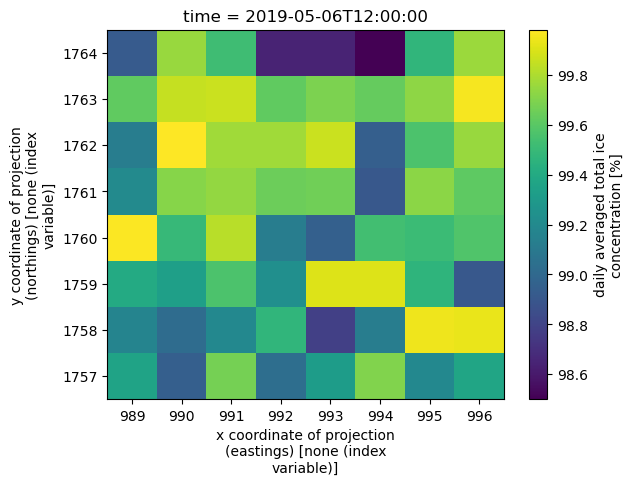

In [10]:
extracted_section["sea_ice_concentration"].plot()

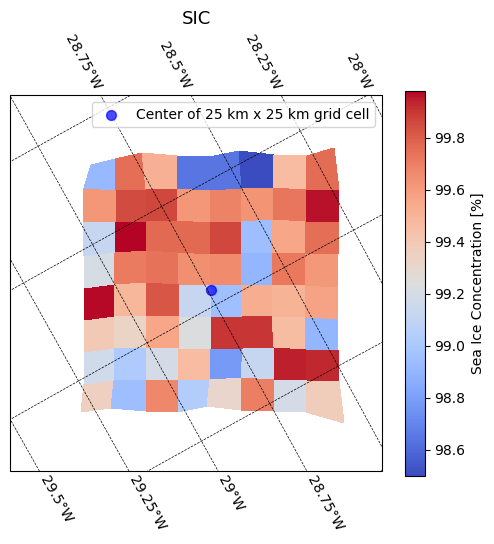

In [11]:
fig, ax1 = plt.subplots(figsize=(6, 5), subplot_kw={"projection": ccrs.SouthPolarStereo()})

T_var = extracted_section["sea_ice_concentration"].isel(time=0)  
lon = extracted_section["longitude"]
lat = extracted_section["latitude"]

# Use pcolormesh to plot sea ice concentration with longitude and latitud
mesh = ax1.pcolormesh(lon, lat, T_var, transform=ccrs.PlateCarree(), cmap="coolwarm")


plt.title("SIC", fontsize=13)

plt.scatter(merged_df["lon_Kako20"][0], merged_df["lat_Kako20"][0], s=50, 
            edgecolor="b", color="blue", alpha=0.7, transform=ccrs.PlateCarree(), label="Center of 25 km x 25 km grid cell")

# Set extent 
extent = [-29.2, -28.34, -73.9, -73.65]
ax1.set_extent(extent, crs=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(mesh, ax=ax1, orientation="vertical", label="Sea Ice Concentration [%]")


gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color="black", linestyle="--")
gl.top_labels = True
gl.right_labels = True

plt.legend(loc="upper right")

plt.show()

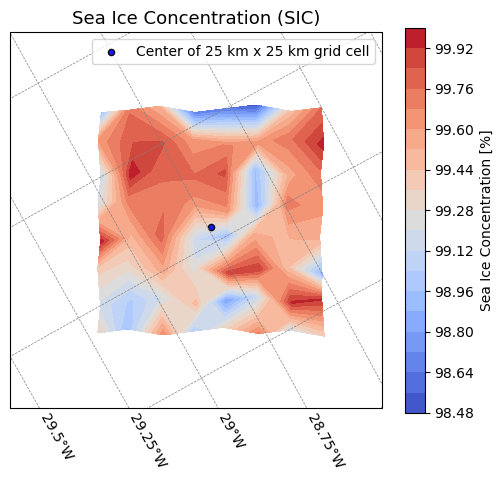

In [12]:
fig, ax1 = plt.subplots(figsize=(6, 5), subplot_kw={"projection": ccrs.SouthPolarStereo()})

T_var = extracted_section["sea_ice_concentration"].isel(time=0)
lon = extracted_section["longitude"]
lat = extracted_section["latitude"]

# Use contourf to create a smoother plot of sea ice concentration
mesh = ax1.contourf(lon, lat, T_var, transform=ccrs.PlateCarree(), cmap="coolwarm", levels=20)

plt.title("Sea Ice Concentration (SIC)", fontsize=13)

plt.scatter(merged_df["lon_Kako20"][0], merged_df["lat_Kako20"][0], s=20, 
            edgecolor="k", color="blue", alpha=0.9, transform=ccrs.PlateCarree(), label="Center of 25 km x 25 km grid cell")

# Set the extent
extent = [-29.2, -28.34, -73.9, -73.65]
ax1.set_extent(extent, crs=ccrs.PlateCarree())


# Add a colorbar with a label
cbar = plt.colorbar(mesh, ax=ax1, orientation="vertical", pad=0.05, label="Sea Ice Concentration [%]")


gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color="gray", linestyle="--")
gl.top_labels = False  

plt.legend(loc="upper right")

plt.show()

<div class="alert alert-danger" role="alert">

### <a id="section3.2"></a>Extract the 8x8 Box of SIC for each Match in 2019
[Back to top](#TOC_TOP)

</div>

In [13]:
data_dir = "SIC_3.125km/2019/"

for index, row in ds_2019.iterrows():
    # Get the timestamp and format it correctly
    timestamp = pd.Timestamp(row["Timestamp"])
    timestamp_str = timestamp.strftime("%Y%m%d")
    
    # Construct the file pattern based on the timestamp
    file_pattern = f"UH-IFM__ASI-L3-SeaIceConcentration_AMSR2__3.125kmPOLSTEREO__SH__{timestamp_str}__v02.nc"
    file_path = data_dir + file_pattern

    ds = xr.open_dataset(file_path)
    
    # Define the center point 
    center_lon = row["lon_Kako20"]
    center_lat = row["lat_Kako20"]
    
    # Flatten the longitude and latitude arrays and find the nearest grid point
    flat_lon = ds["longitude"].values.flatten()
    flat_lat = ds["latitude"].values.flatten()

    # Calculate the distances to the center point
    distances = np.sqrt((flat_lon - center_lon)**2 + (flat_lat - center_lat)**2)

    # Find the index of the minimum distance
    min_idx = distances.argmin()
    
    y_index, x_index = np.unravel_index(min_idx, ds["longitude"].shape)

    # Define the grid size (8x8)
    grid_size = 8
    half_grid_size = grid_size // 2 
    
    y_start_idx = max(0, y_index - half_grid_size)
    y_end_idx = min(ds.dims["y"], y_index + half_grid_size)  

    x_start_idx = max(0, x_index - half_grid_size +1 )
    x_end_idx = min(ds.dims["x"], x_index + half_grid_size +1 )  # +1 
    
    # Extract the 8x8 grid section using index slicing
    extracted_section = ds.isel(y=slice(y_start_idx, y_end_idx), x=slice(x_start_idx, x_end_idx))
    
    output_file = f"extracted_section_{timestamp_str}.nc"
    extracted_section.to_netcdf(output_file)

    print(f"For timestamp {timestamp}:")
    print(extracted_section)
    print("\n")

    ds.close()


C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)


For timestamp 2019-05-06 00:00:00:
<xarray.Dataset>
Dimensions:                (y: 8, x: 8, time: 1)
Coordinates:
  * y                      (y) int16 1757 1758 1759 1760 1761 1762 1763 1764
  * x                      (x) int16 989 990 991 992 993 994 995 996
  * time                   (time) datetime64[ns] 2019-05-06T12:00:00
Data variables:
    land                   (y, x) int8 ...
    longitude              (y, x) float32 -29.22 -29.13 -29.04 ... -28.34 -28.25
    latitude               (y, x) float32 -73.82 -73.83 -73.85 ... -73.73 -73.74
    sea_ice_concentration  (time, y, x) float32 ...
Attributes: (12/17)
    Comment:            List of swath files used for the daily mean: ['GW1AM2...
    grid_resolution:    3.125 km
    description:        gridded ASI AMSR2 sea ice concentration
    algorithm:          ASI v5
    title:              Daily averaged Antarctic sea ice concentration derive...
    tiepoints:          P0=47 K, P1=11.7 K
    ...                 ...
    datasource:  

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)


For timestamp 2019-06-23 00:00:00:
<xarray.Dataset>
Dimensions:                (y: 8, x: 8, time: 1)
Coordinates:
  * y                      (y) int16 1716 1717 1718 1719 1720 1721 1722 1723
  * x                      (x) int16 910 911 912 913 914 915 916 917
  * time                   (time) datetime64[ns] 2019-06-23T12:00:00
Data variables:
    land                   (y, x) int8 ...
    longitude              (y, x) float32 -38.13 -38.05 -37.98 ... -37.23 -37.15
    latitude               (y, x) float32 -73.54 -73.56 -73.58 ... -73.49 -73.51
    sea_ice_concentration  (time, y, x) float32 ...
Attributes: (12/17)
    Comment:            List of swath files used for the daily mean: ['GW1AM2...
    grid_resolution:    3.125 km
    description:        gridded ASI AMSR2 sea ice concentration
    algorithm:          ASI v5
    title:              Daily averaged Antarctic sea ice concentration derive...
    tiepoints:          P0=47 K, P1=11.7 K
    ...                 ...
    datasource:  

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)
C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3382222467.py:44: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  extracted_section.to_netcdf(output_file)


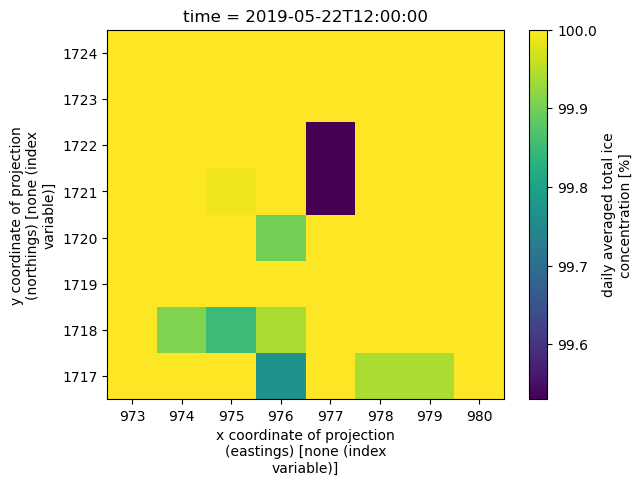

In [14]:
file_pattern = "extracted_section_20190522.nc"
ds = xr.open_dataset(file_pattern)
ds["sea_ice_concentration"].plot()
ds.close()

<div class="alert alert-danger" role="alert">

### <a id="section3.3"></a>Extract the 8x8 Box of SIC for each Match in 2021
[Back to top](#TOC_TOP)

</div>

In [15]:
data_dir = "SIC_3.125km/2021/"

for index, row in ds_2021.iterrows():
    
    timestamp = pd.Timestamp(row["Timestamp"])
    timestamp_str = timestamp.strftime("%Y%m%d")
    
   
    file_pattern = f"UH-IFM__ASI-L3-SeaIceConcentration_AMSR2__3.125kmPOLSTEREO__SH__{timestamp_str}__v02_fv0.02.nc"
    file_path = data_dir + file_pattern
    
    
    ds = xr.open_dataset(file_path)
    
    center_lon = row["lon_Kako20"]
    center_lat = row["lat_Kako20"]
    
    
    flat_lon = ds["longitude"].values.flatten()
    flat_lat = ds["latitude"].values.flatten()

    # Calculate the distances to the center point
    distances = np.sqrt((flat_lon - center_lon)**2 + (flat_lat - center_lat)**2)

    # Find the index of the minimum distance
    min_idx = distances.argmin()

    y_index, x_index = np.unravel_index(min_idx, ds["longitude"].shape)

    # Define the grid size (8x8)
    grid_size = 8
    half_grid_size = grid_size // 2

    y_start_idx = max(0, y_index - half_grid_size)
    y_end_idx = min(ds.dims["y"], y_index + half_grid_size)  

    x_start_idx = max(0, x_index - half_grid_size +1 )
    x_end_idx = min(ds.dims["x"], x_index + half_grid_size +1 )  # +1 

    # Extract the 8x8 grid section using index slicing
    extracted_section = ds.isel(y=slice(y_start_idx, y_end_idx), x=slice(x_start_idx, x_end_idx))
    
    output_file = f"extracted_section_{timestamp_str}.nc"
    extracted_section.to_netcdf(output_file)

    print(f"For timestamp {timestamp}:")
    print(extracted_section)
    print("\n")

    ds.close()


For timestamp 2021-04-01 00:00:00:
<xarray.Dataset>
Dimensions:                (x: 8, y: 8, time: 1)
Coordinates:
  * x                      (x) int16 958 959 960 961 962 963 964 965
  * y                      (y) int16 1660 1661 1662 1663 1664 1665 1666 1667
  * time                   (time) datetime64[ns] 2021-04-01
Data variables:
    latitude               (y, x) float32 -75.64 -75.66 -75.67 ... -75.58 -75.6
    longitude              (y, x) float32 -37.77 -37.68 -37.59 ... -36.74 -36.65
    sea_ice_concentration  (time, y, x) float32 ...
    land                   (y, x) int8 ...
Attributes: (12/25)
    Conventions:      CF-1.6
    title:            Daily averaged Arctic sea ice concentration derived fro...
    Summary:          Daily gridded GCOM-W1 AMSR2 ARTIST Sea Ice (ASI) Concen...
    hemisphere:       south
    gridding_method:  Nearest Neighbor, with Python package pyresample
    tiepoints:        P0=47K, P1=11.7K
    ...               ...
    grid:             NSIDC polar

For timestamp 2021-06-11 00:00:00:
<xarray.Dataset>
Dimensions:                (x: 8, y: 8, time: 1)
Coordinates:
  * x                      (x) int16 925 926 927 928 929 930 931 932
  * y                      (y) int16 1717 1718 1719 1720 1721 1722 1723 1724
  * time                   (time) datetime64[ns] 2021-06-11
Data variables:
    latitude               (y, x) float32 -73.79 -73.8 -73.82 ... -73.73 -73.74
    longitude              (y, x) float32 -36.88 -36.8 -36.72 ... -35.97 -35.89
    sea_ice_concentration  (time, y, x) float32 ...
    land                   (y, x) int8 ...
Attributes: (12/25)
    Conventions:      CF-1.6
    title:            Daily averaged Arctic sea ice concentration derived fro...
    Summary:          Daily gridded GCOM-W1 AMSR2 ARTIST Sea Ice (ASI) Concen...
    hemisphere:       south
    gridding_method:  Nearest Neighbor, with Python package pyresample
    tiepoints:        P0=47K, P1=11.7K
    ...               ...
    grid:             NSIDC polar 

For timestamp 2021-09-12 00:00:00:
<xarray.Dataset>
Dimensions:                (x: 8, y: 8, time: 1)
Coordinates:
  * x                      (x) int16 790 791 792 793 794 795 796 797
  * y                      (y) int16 1684 1685 1686 1687 1688 1689 1690 1691
  * time                   (time) datetime64[ns] 2021-09-12
Data variables:
    latitude               (y, x) float32 -71.88 -71.9 -71.92 ... -71.87 -71.89
    longitude              (y, x) float32 -48.52 -48.46 -48.4 ... -47.69 -47.63
    sea_ice_concentration  (time, y, x) float32 ...
    land                   (y, x) int8 ...
Attributes: (12/25)
    Conventions:      CF-1.6
    title:            Daily averaged Arctic sea ice concentration derived fro...
    Summary:          Daily gridded GCOM-W1 AMSR2 ARTIST Sea Ice (ASI) Concen...
    hemisphere:       south
    gridding_method:  Nearest Neighbor, with Python package pyresample
    tiepoints:        P0=47K, P1=11.7K
    ...               ...
    grid:             NSIDC polar 

<div class="alert alert-danger" role="alert">

### <a id="section3.4"></a>Extract the 8x8 Box of SIC for each Match in 2022
[Back to top](#TOC_TOP)

</div>

In [16]:
data_dir = "SIC_3.125km/2022/"

for index, row in ds_2022.iterrows():
    timestamp = pd.Timestamp(row["Timestamp"])
    timestamp_str = timestamp.strftime("%Y%m%d")
    
    file_pattern = f"UH-IFM__ASI-L3-SeaIceConcentration_AMSR2__3.125kmPOLSTEREO__SH__{timestamp_str}__v02_fv0.02.nc"
    file_path = data_dir + file_pattern
    

    ds = xr.open_dataset(file_path)
    
    center_lon = row["lon_Kako20"]
    center_lat = row["lat_Kako20"]
    
    flat_lon = ds["longitude"].values.flatten()
    flat_lat = ds["latitude"].values.flatten()

    # Calculate the distances to the center point
    distances = np.sqrt((flat_lon - center_lon)**2 + (flat_lat - center_lat)**2)

    min_idx = distances.argmin()

    y_index, x_index = np.unravel_index(min_idx, ds["longitude"].shape)

    # Define the grid size (8x8)
    grid_size = 8
    half_grid_size = grid_size // 2

    y_start_idx = max(0, y_index - half_grid_size)
    y_end_idx = min(ds.dims["y"], y_index + half_grid_size)  

    x_start_idx = max(0, x_index - half_grid_size +1 )
    x_end_idx = min(ds.dims["x"], x_index + half_grid_size +1 )  # +1 

    # Extract the 8x8 grid section using index slicing
    extracted_section = ds.isel(y=slice(y_start_idx, y_end_idx), x=slice(x_start_idx, x_end_idx))
    
    output_file = f"extracted_section_{timestamp_str}.nc"
    extracted_section.to_netcdf(output_file)

    
    print(f"For timestamp {timestamp}:")
    print(extracted_section)
    print("\n")


    ds.close()


For timestamp 2022-05-09 00:00:00:
<xarray.Dataset>
Dimensions:                (x: 8, y: 8, time: 1)
Coordinates:
  * x                      (x) int16 581 582 583 584 585 586 587 588
  * y                      (y) int16 1757 1758 1759 1760 1761 1762 1763 1764
  * time                   (time) datetime64[ns] 2022-05-09
Data variables:
    latitude               (y, x) float32 -66.04 -66.06 -66.08 ... -66.06 -66.08
    longitude              (y, x) float32 -54.23 -54.19 -54.15 ... -53.6 -53.56
    sea_ice_concentration  (time, y, x) float32 ...
    land                   (y, x) int8 ...
Attributes: (12/25)
    Conventions:      CF-1.6
    title:            Daily averaged Arctic sea ice concentration derived fro...
    Summary:          Daily gridded GCOM-W1 AMSR2 ARTIST Sea Ice (ASI) Concen...
    hemisphere:       south
    gridding_method:  Nearest Neighbor, with Python package pyresample
    tiepoints:        P0=47K, P1=11.7K
    ...               ...
    grid:             NSIDC polar

<div class="alert alert-danger" role="alert">

### <a id="section3.5"></a>Load all Extracted 8x8 Box of SIC and Calculate Mean SIC
[Back to top](#TOC_TOP)

</div>

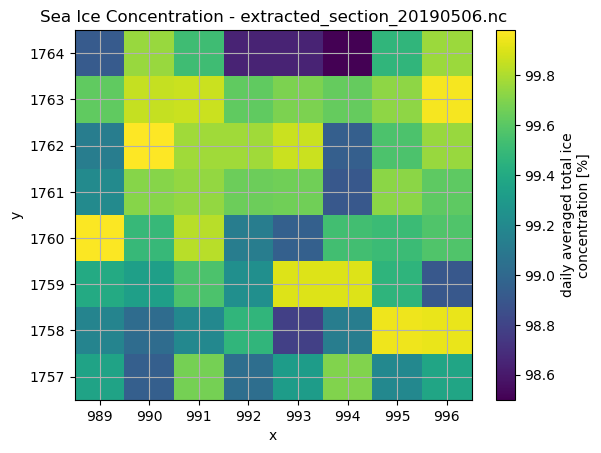

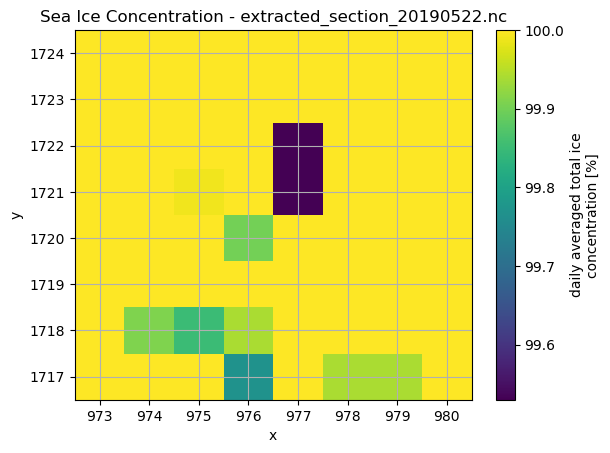

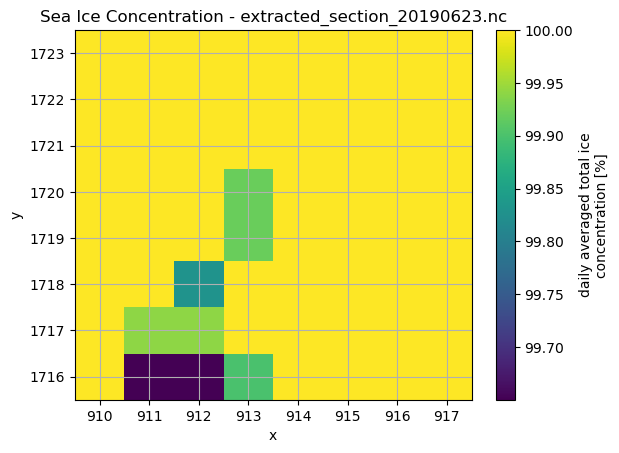

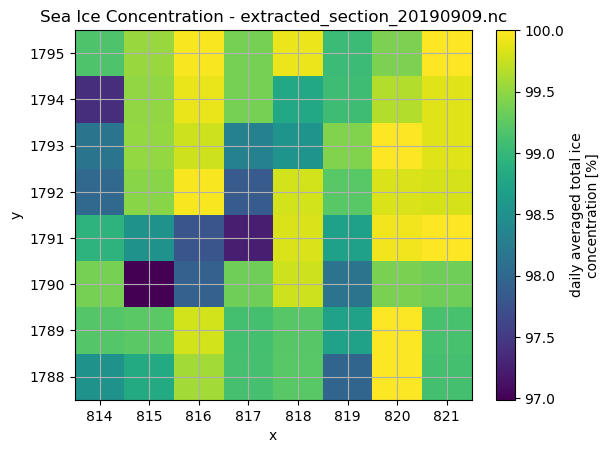

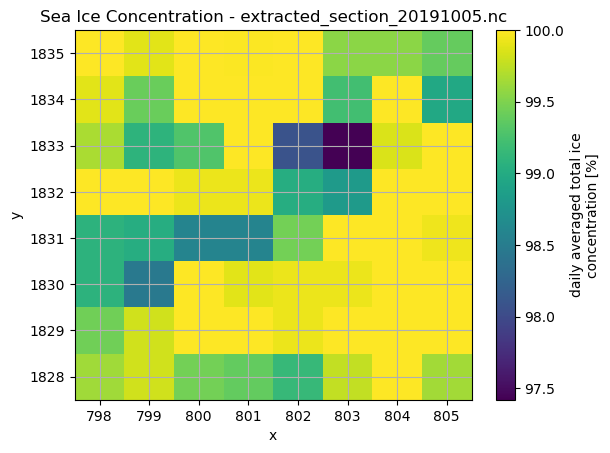

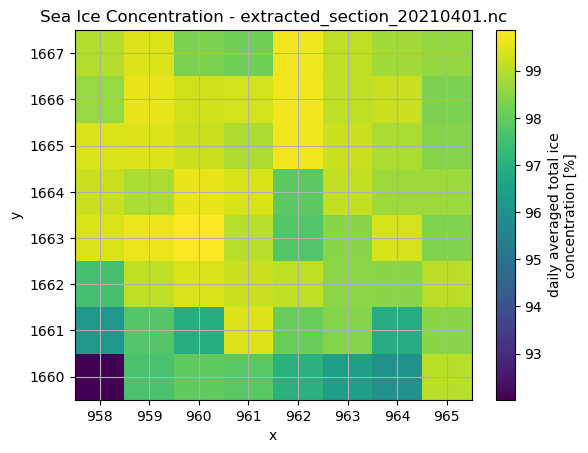

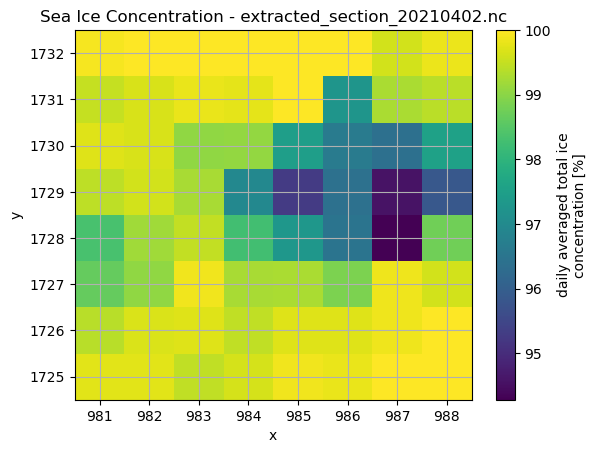

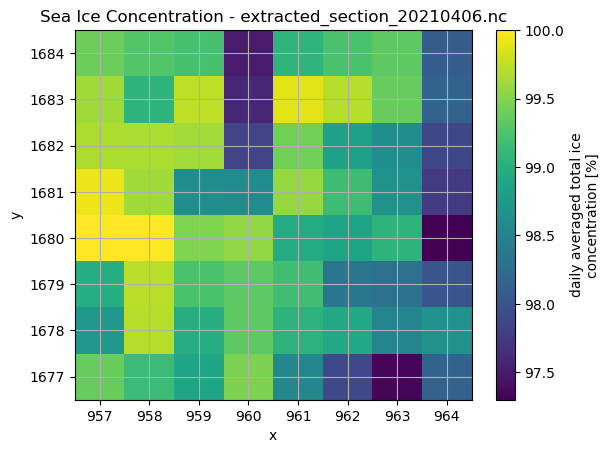

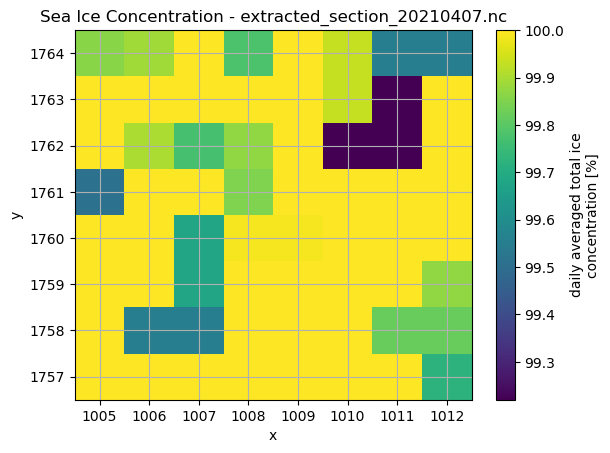

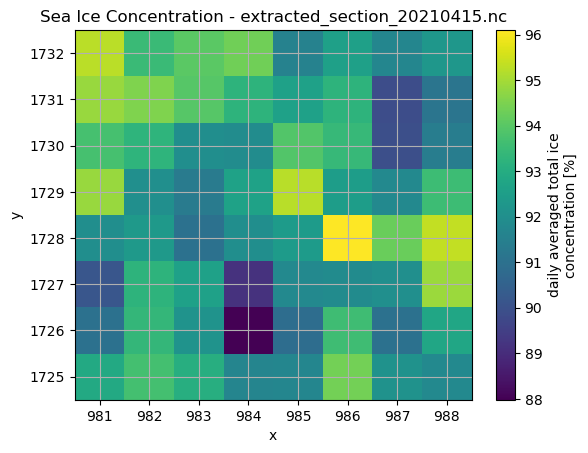

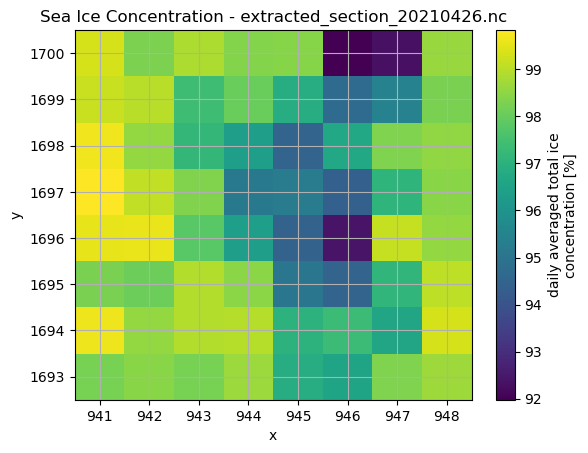

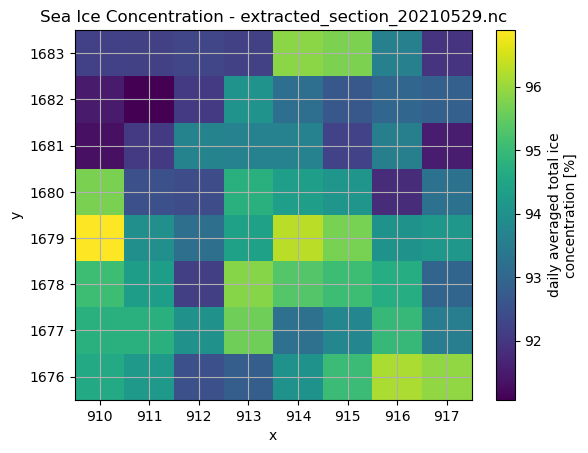

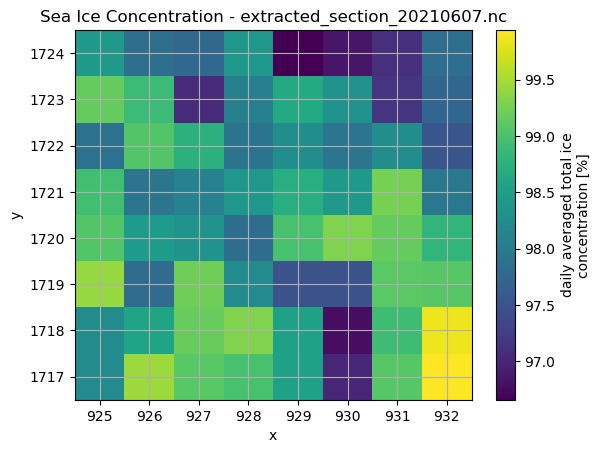

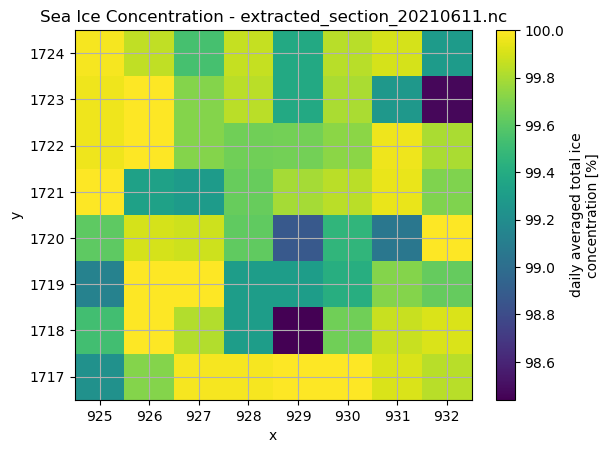

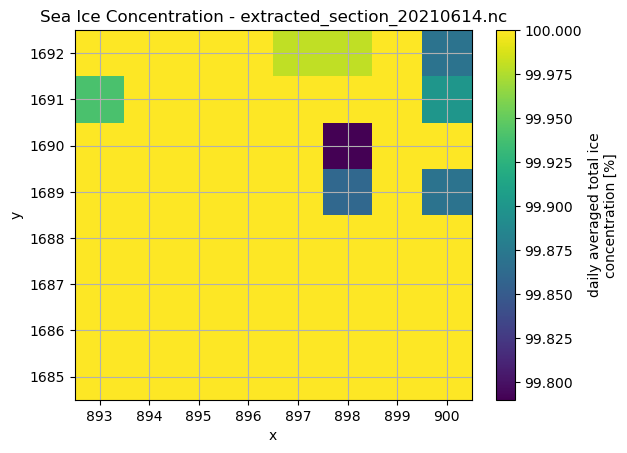

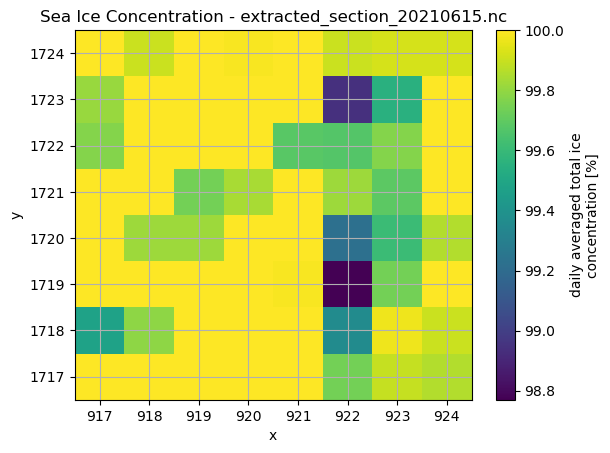

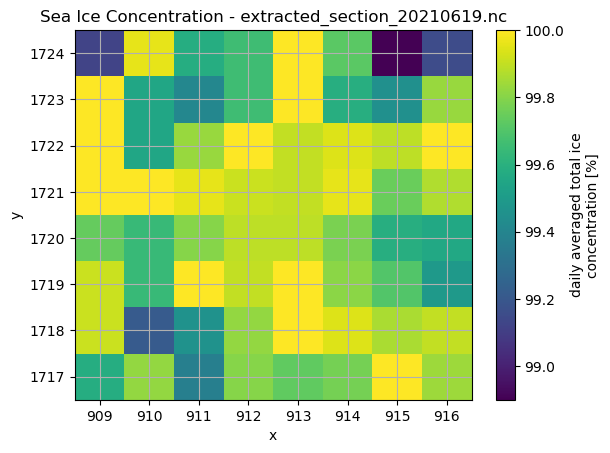

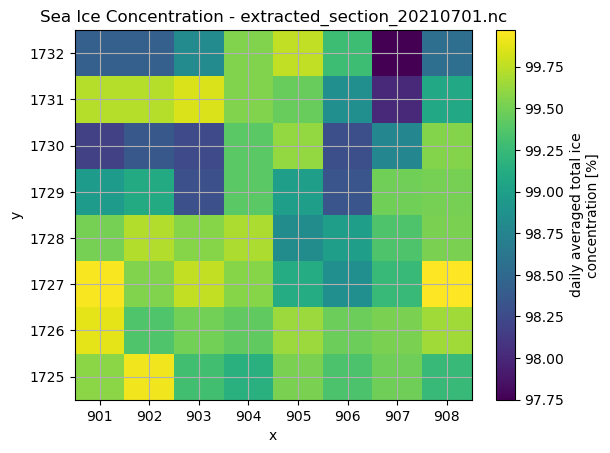

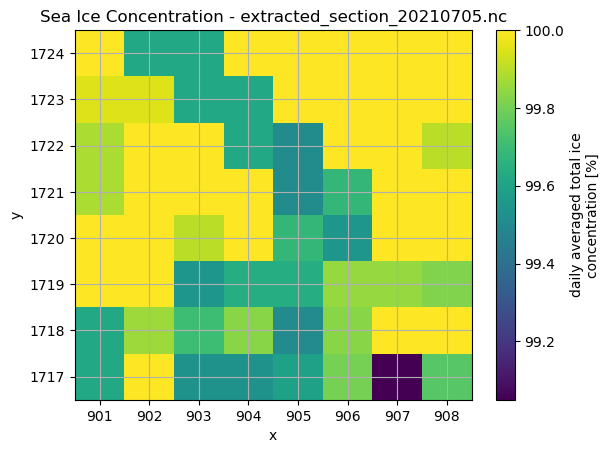

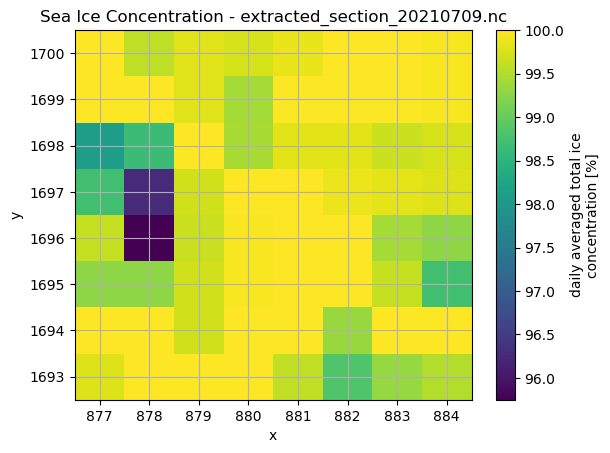

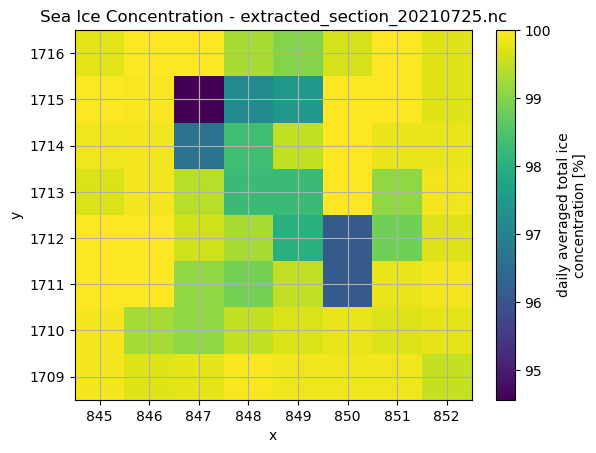

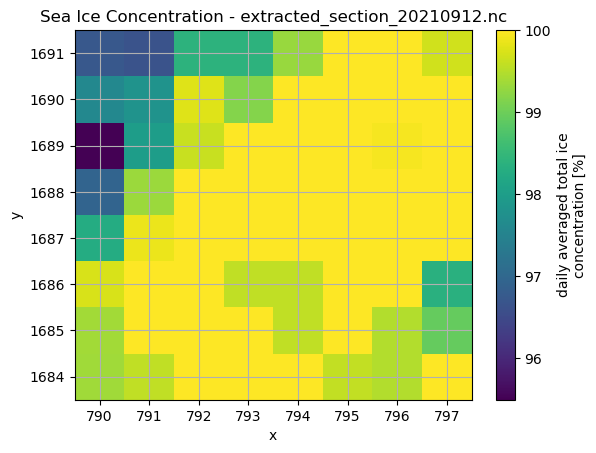

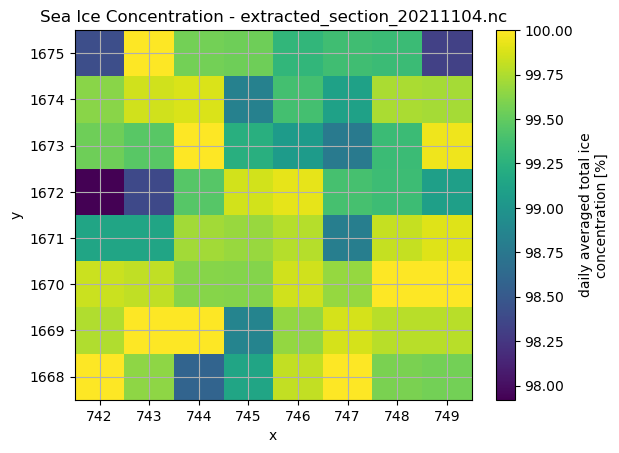

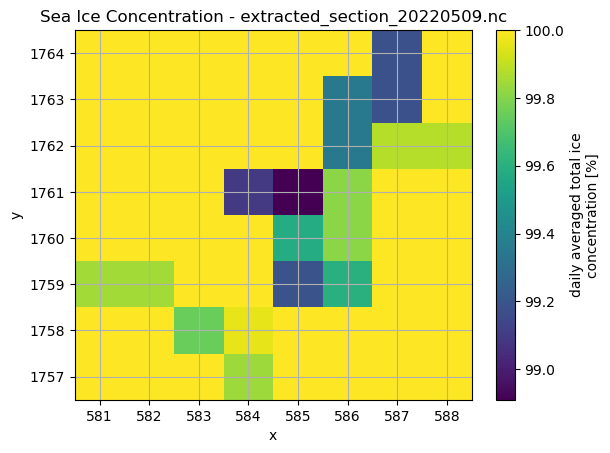

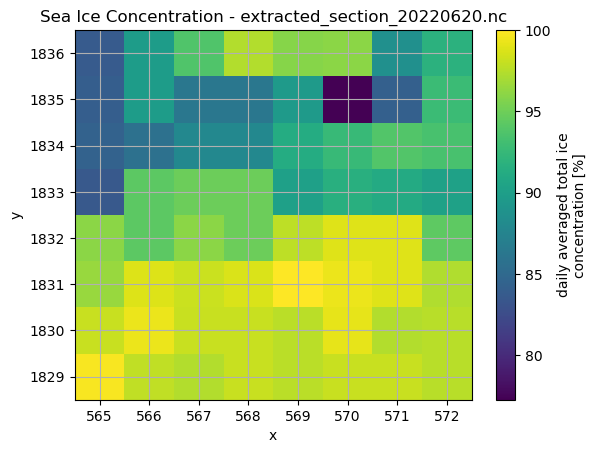

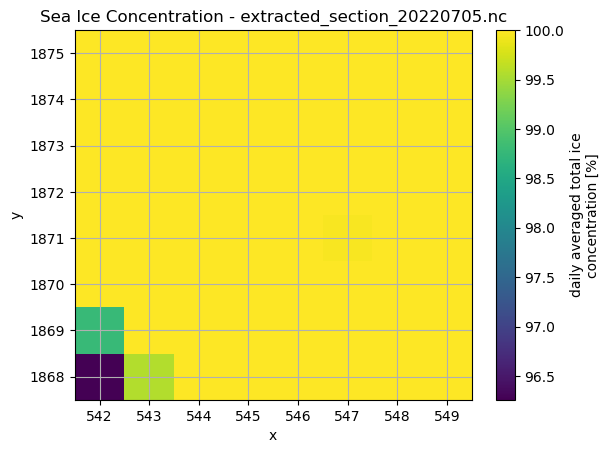

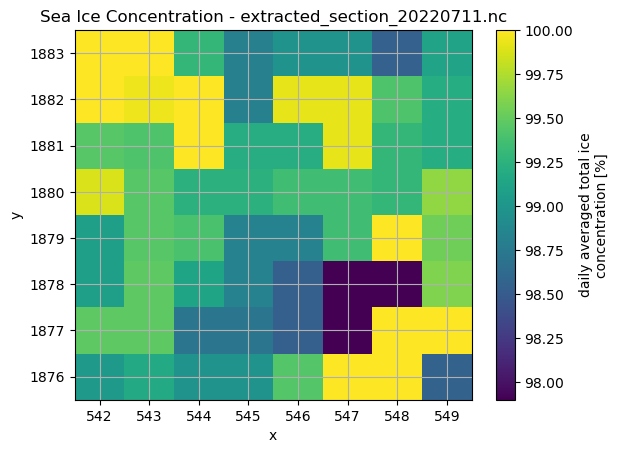

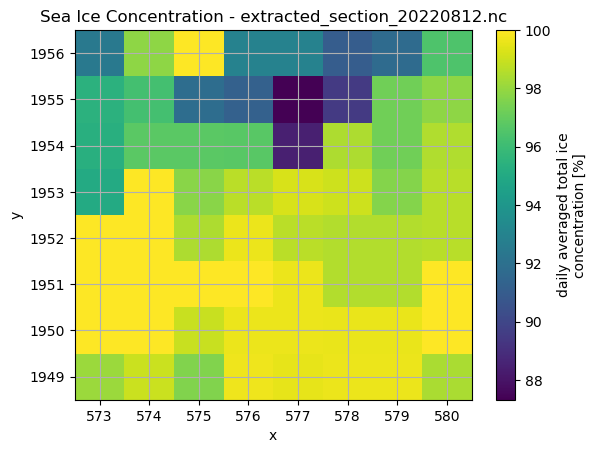

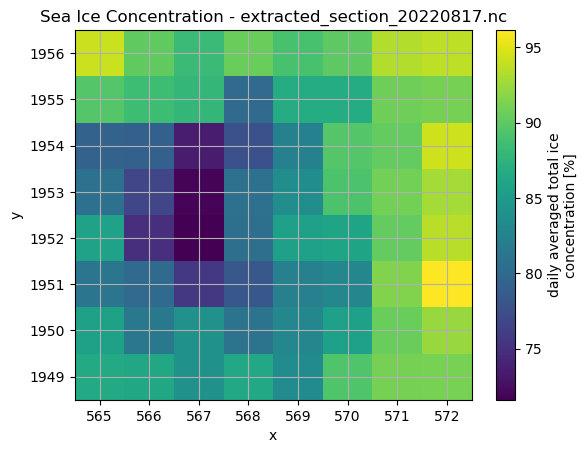

In [17]:
data_dir = os.getcwd()

file_pattern = "extracted_section_*.nc"

file_list = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith("extracted_section_") and f.endswith(".nc")])


mean_SIC = []
std_SIC = []

for file_path in file_list:

    ds = xr.open_dataset(file_path)
    
    # Plot sea_ice_concentration
    ds["sea_ice_concentration"].plot()
    
    #Calculate mean
    mean = np.mean(ds["sea_ice_concentration"].values)
    std = np.std(ds["sea_ice_concentration"].values)
    
    mean_SIC.append(mean)
    std_SIC.append(std)

    plt.title(f"Sea Ice Concentration - {os.path.basename(file_path)}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
    ds.close()

In [18]:
merged_df["SIC_mean"] = mean_SIC
merged_df["SIC_std"] = std_SIC

matches_all = merged_df
matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,SIC_mean,SIC_std
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,99.452026,0.373146
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,99.973434,0.088481
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,99.980469,0.066083
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,99.143593,0.748101
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,99.606567,0.538631
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,98.544998,1.210280
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02,98.893906,1.423231
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,98.944992,0.690609
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,99.886246,0.201731
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15,92.609215,1.551470


<div class="alert alert-info" role="alert">

## <a id="section4"></a>Analysis of Sea Ice Concentration Dependency
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section4.1"></a>Map of Sea Ice Concentration for 27 Matches
[Back to top](#TOC_TOP)

</div>

In [19]:
plt.style.use("ggplot")

In [20]:
withoutS112 = matches_all[matches_all["Sensor_Number"] != "S112"]
withoutS112 = withoutS112.reset_index(drop=True)
withoutS112

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,SIC_mean,SIC_std
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,99.452026,0.373146
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,99.973434,0.088481
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,99.980469,0.066083
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,99.143593,0.748101
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,99.606567,0.538631
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,98.544998,1.210280
6,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,98.944992,0.690609
7,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,99.886246,0.201731
8,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26,97.496552,1.875355
9,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29,93.757034,1.410904


C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\3827279735.py:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter, ax=ax, location="right")


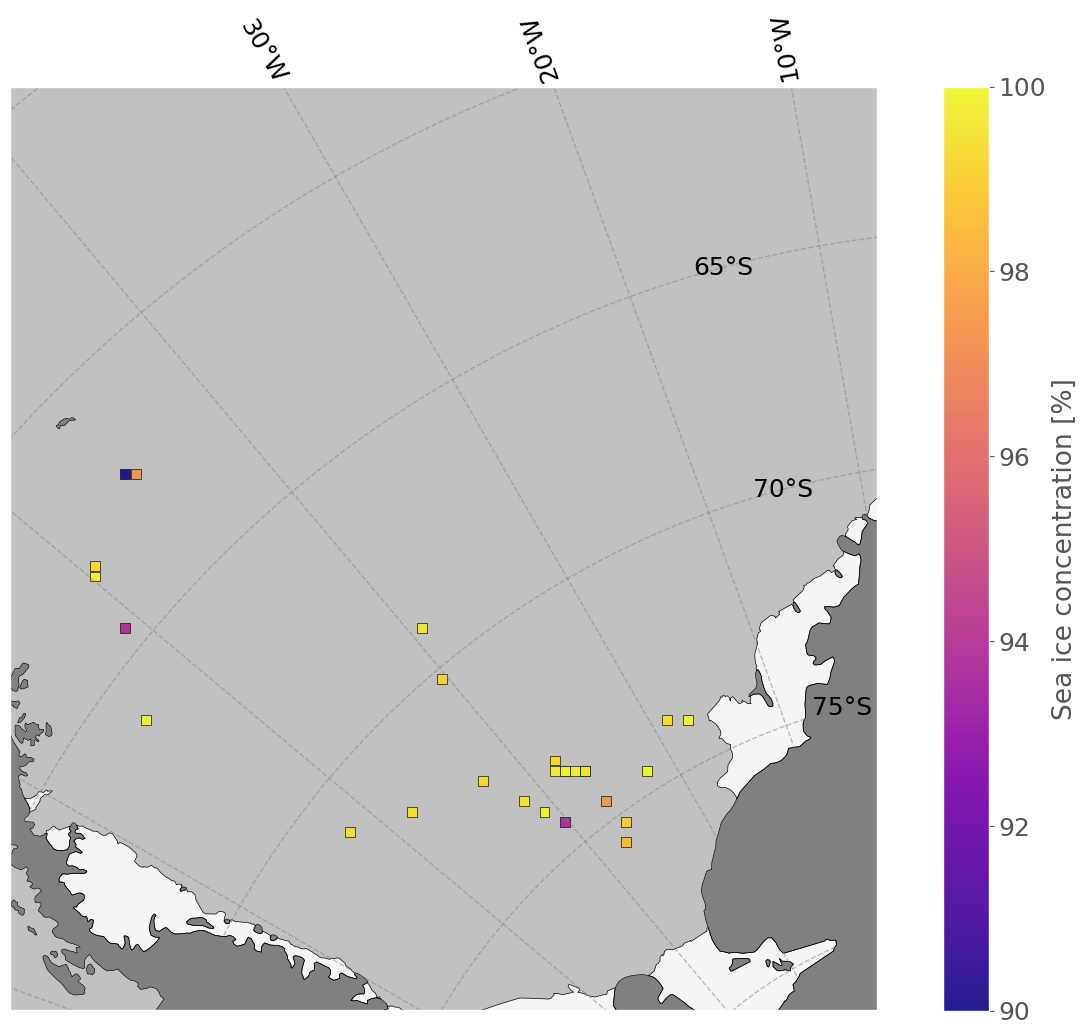

In [21]:
fig, ax = plt.subplots(figsize=(17, 12), subplot_kw={"projection": ccrs.SouthPolarStereo()})


scatter = (plt.scatter(withoutS112["lon_Kako20"], withoutS112["lat_Kako20"], c=withoutS112["SIC_mean"],  marker="s", 
                       cmap="plasma", s=50, edgecolor="k", alpha=0.9, transform=ccrs.PlateCarree(), vmin=90, vmax=100))

# Weddell Sea region
extent = [-50, -15, -78, -61]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add natural features
Ice_shelves = cfeature.NaturalEarthFeature(
    category="physical",
    name="antarctic_ice_shelves_polys",
    scale="50m"
)

ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax.add_feature(cfeature.OCEAN, facecolor="silver")
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")

ax.coastlines()



gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.bottom_labels = False  # Do not show bottom longitude labels
gl.xlabel_style = {"size": 18}
gl.ylabel_style = {"size": 18}

cbar = plt.colorbar(scatter, ax=ax, location="right")
cbar.set_label("Sea ice concentration [%]", fontsize=19)

cbar.ax.tick_params(labelsize=18)

#plt.savefig("SIC_location.png", bbox_inches="tight", dpi=300)
plt.show()

### Add Snow Buoys trajectories

In [22]:
file = "ds_buoys_27.csv"
ds = pd.read_csv(file, sep=None, engine="python") 
ds

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
0,2013,6,25,735410,-67.5638,0.2128,27.857,0.0,27.857,NaN,S6,2013-06-25
1,2013,6,26,735411,-67.7944,0.4910,29.172,0.0,29.172,NaN,S6,2013-06-26
2,2013,6,27,735412,-67.9626,0.6800,33.463,0.0,33.463,NaN,S6,2013-06-27
3,2013,6,28,735413,-68.0446,-1.4778,36.559,0.0,36.559,NaN,S6,2013-06-28
4,2013,6,29,735414,-68.0078,-2.2416,29.353,0.0,29.353,NaN,S6,2013-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...
6649,2022,6,3,738675,-62.5614,-49.7654,27.049,0.0,27.049,197.979,S119,2022-06-03
6650,2022,6,4,738676,-62.6346,-49.4788,27.077,0.0,27.077,198.086,S119,2022-06-04
6651,2022,6,5,738677,-62.7924,-49.2240,26.675,0.0,26.675,198.129,S119,2022-06-05
6652,2022,6,6,738678,-62.8800,-49.1044,27.43,0.0,27.430,198.292,S119,2022-06-06


In [23]:
ds["timestamp"] = pd.to_datetime(ds["timestamp"], errors="coerce")

# List of months
months = [4, 5, 6, 7, 8, 9, 10, 11]

# Filter for the specified months
filtered_ds_months = ds[ds["Month"].isin(months)]

# List of years
years = [2019, 2020, 2021, 2022]

# Iterate over years
for year in years:
    # Filter for the years
    filtered_ds = filtered_ds_months[filtered_ds_months["Year"] == year]
    
    if year == 2019:
        ds_2019 = filtered_ds
    elif year == 2020:
        ds_2020 = filtered_ds
    elif year == 2021:
        ds_2021 = filtered_ds
    elif year == 2022:
        ds_2022 = filtered_ds

#no snow data in july 7 month in satellite product
ds_2019 = ds_2019[ds_2019["Month"] != 7]

#no snow data in Oct and Nov in satellite product
ds_2022 = ds_2022[ds_2022["Month"] != 10]
ds_2022 = ds_2022[ds_2022["Month"] != 11]

ds_S114 = ds_2021[ds_2021["Sensor Number"] == "S114"] #custom_palette[8]
ds_S114_2022 = ds_2022[ds_2022["Sensor Number"] == "S114"] #custom_palette[8]
ds_S112 = ds_2021[ds_2021["Sensor Number"] == "S112"] #custom_palette[5]
ds_S55 = ds_2021[ds_2021["Sensor Number"] == "S55"]  #custom_palette[2]
ds_S56 = ds_2019[ds_2019["Sensor Number"] == "S56"] #custom_palette[0]

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_31084\1214975894.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter, ax=ax, location="right", label="Sea ice concentration [%]")


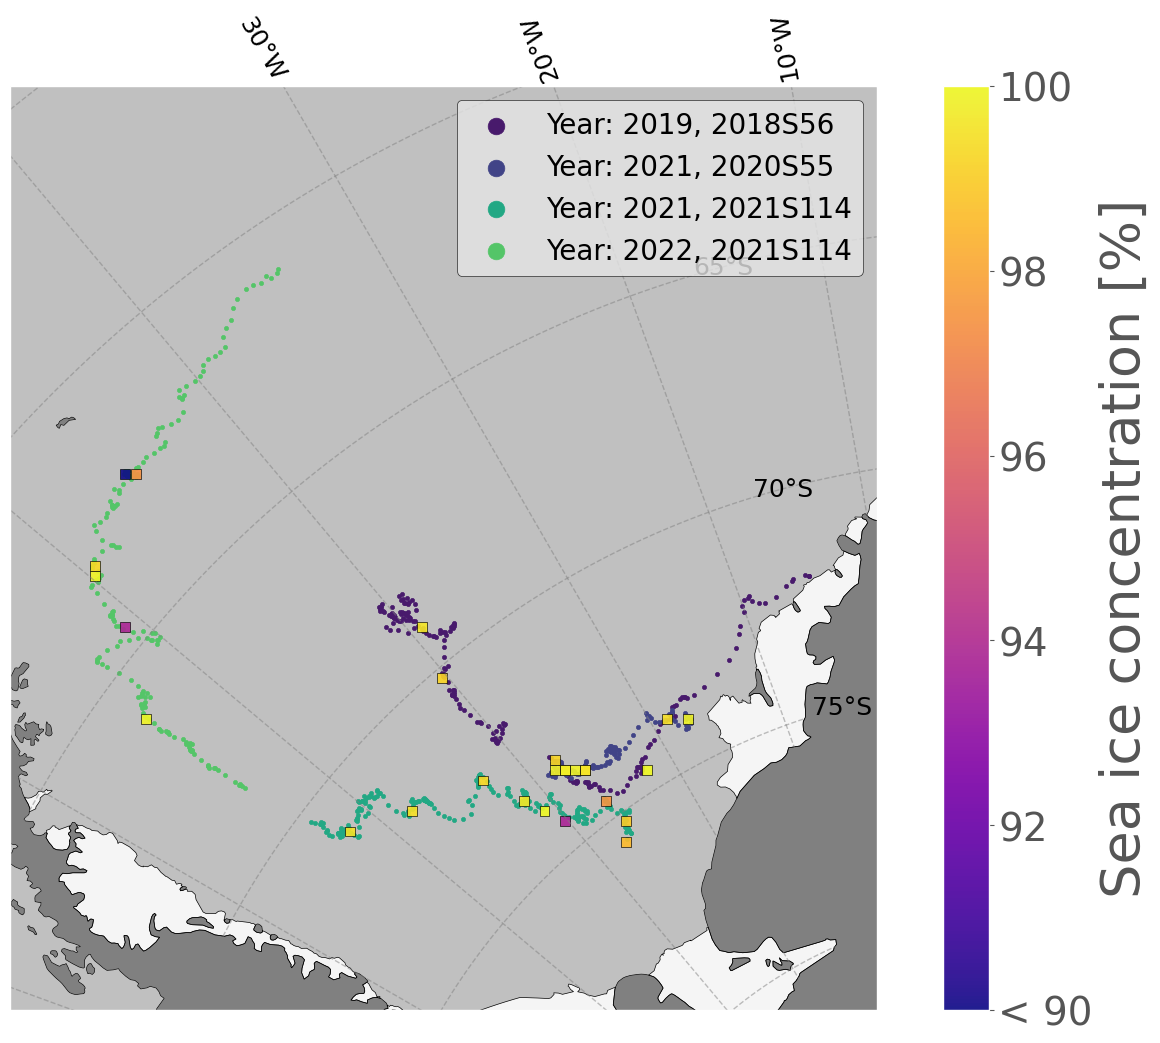

In [24]:
fig, ax = plt.subplots(figsize=(17, 12), subplot_kw={"projection": ccrs.SouthPolarStereo()})

custom_palette = sns.color_palette("viridis", 14) 

#Snow Buoy trajectories

ax.scatter(ds_S56["Longitude"], ds_S56["Latitude"], transform=ccrs.PlateCarree(), marker=".", 
                       color=custom_palette[0], label="Year: 2019, 2018S56")

ax.scatter(ds_S55["Longitude"], ds_S55["Latitude"], transform=ccrs.PlateCarree(), marker=".", 
                       color=custom_palette[2], label="Year: 2021, 2020S55")


ax.scatter(ds_S114["Longitude"], ds_S114["Latitude"], transform=ccrs.PlateCarree(), marker=".", 
                       color=custom_palette[8], label="Year: 2021, 2021S114")

ax.scatter(ds_S114_2022["Longitude"], ds_S114_2022["Latitude"], transform=ccrs.PlateCarree(), marker=".", 
                       color=custom_palette[10], label="Year: 2022, 2021S114")

#SIC

scatter = (ax.scatter(withoutS112["lon_Kako20"], withoutS112["lat_Kako20"], c=withoutS112["SIC_mean"],  marker="s", 
                       cmap="plasma", s=50, edgecolor="k", alpha=0.9, transform=ccrs.PlateCarree(), vmin=90, vmax=100))

cbar = plt.colorbar(scatter, ax=ax, location="right", label="Sea ice concentration [%]")
cbar.set_label("Sea ice concentration [%]", fontsize=39)

cbar_ticks = np.linspace(90, 100, num=6)
cbar_ticklabels = [str(int(tick)) for tick in cbar_ticks]
cbar_ticklabels[0] = "< 90"

cbar.ax.tick_params(labelsize=28)
cbar.set_ticks(cbar_ticks)
cbar.ax.set_yticklabels(cbar_ticklabels)


# Weddell Sea region
extent = [-50, -15, -78, -61]
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax.add_feature(cfeature.OCEAN, facecolor="silver")
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.bottom_labels = False  
gl.xlabel_style = {"size": 18}
gl.ylabel_style = {"size": 18}


plt.legend(loc="upper right", edgecolor="black", prop={"size": 20}, markerscale=4)

plt.savefig("SIC_location.png", bbox_inches="tight", dpi=300)
plt.show()


<div class="alert alert-danger" role="alert">

### <a id="section4.2"></a>Histogram of SIC
[Back to top](#TOC_TOP)

</div>

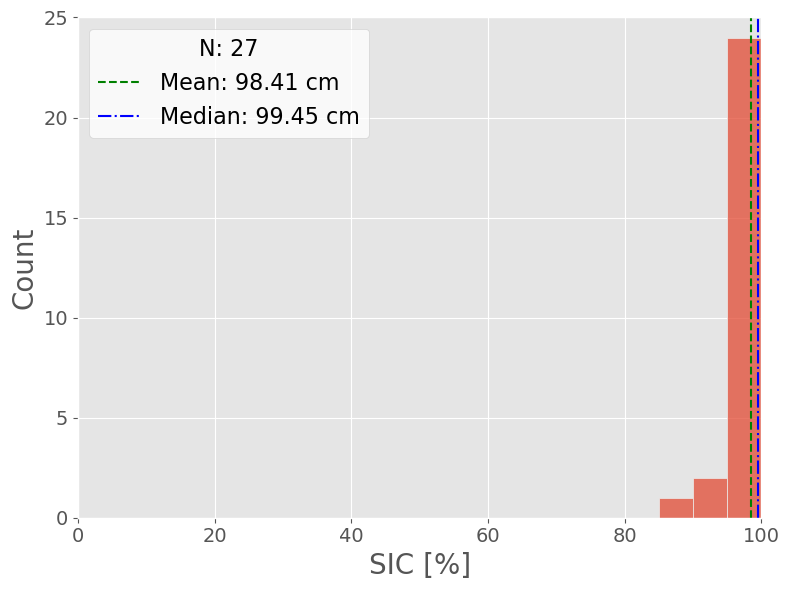

In [25]:
SIC = matches_all[matches_all["Sensor_Number"] != "S112"]["SIC_mean"]
SampleMean_SIC = np.nanmean(SIC)
SampleMedian_SIC = np.nanmedian(SIC)

fig, axs = plt.subplots(figsize=(8, 6))

# Define font size
title_fontsize = 20
label_fontsize = 20
linespacing = 1.5

# Set the axis limits
x_limits = (0, 100)
y_limits = (0, 25)

# Define bin width and calculate the number of bins
bin_width = 5
bins = np.arange(x_limits[0], x_limits[1] + bin_width, bin_width)

sns.histplot(SIC, stat="count", bins=bins, ax=axs)
axs.axvline(SampleMean_SIC, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_SIC))
axs.axvline(SampleMedian_SIC, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_SIC))
axs.set_xlabel("SIC [%]", fontsize=label_fontsize)
axs.set_ylabel("Count", fontsize=label_fontsize)
axs.set_xlim(x_limits)
axs.set_ylim(y_limits)
axs.legend(title=f"N: 27", title_fontsize=16, loc="upper left", fontsize=16, facecolor="white")

plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)

plt.tight_layout()

plt.savefig("SIC_Histogram.png", dpi=300, bbox_inches="tight")

plt.show()
